In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
classes = pd.read_csv('elliptic_txs_classes.csv')
features = pd.read_csv('elliptic_txs_features.csv', header=None)

data = features.merge(classes, left_on=0, right_on='txId', how='left')
data = data.loc[data['class'] != 'unknown']
data['class'] = (data['class'].astype(int)-2)*(-1)

X = data.drop([1, 'txId', 0, 'class'], axis=1)
X[166] = np.nan
X[167] = np.nan
X[168] = np.nan
X[169] = np.nan
X[170] = np.nan

In [3]:
summary = data.drop(['txId', 0],axis=1)[[1, 'class']].groupby(1).agg(['count', 'mean', 'median', 'std'])
summary.to_csv('descriptive_stats.csv')
data[['txId', 'class']].groupby('class').agg('count')

,txId
class,
0,42019
1,4545


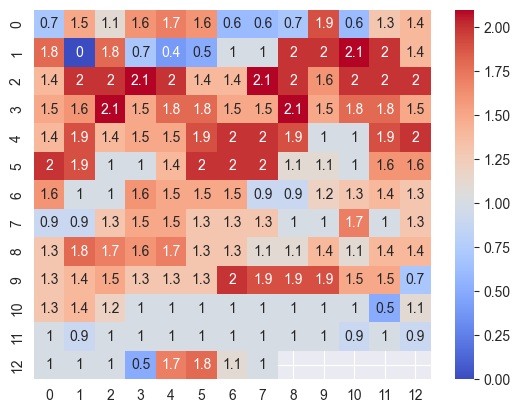

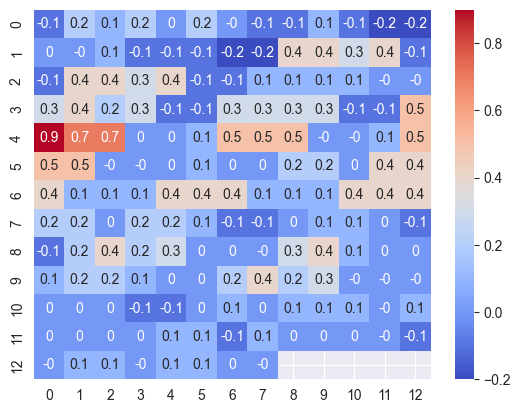

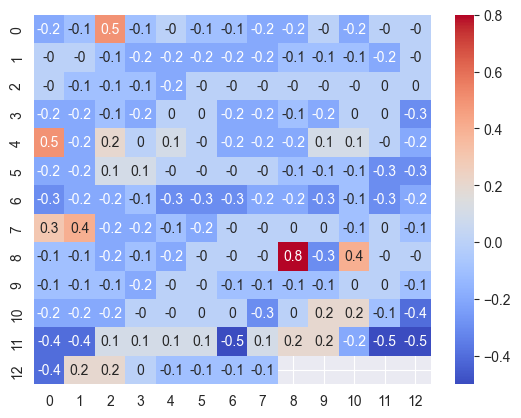

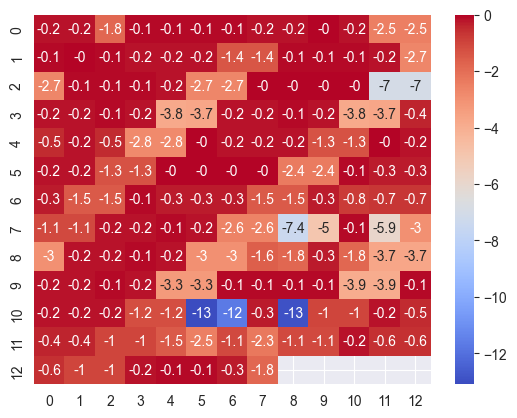

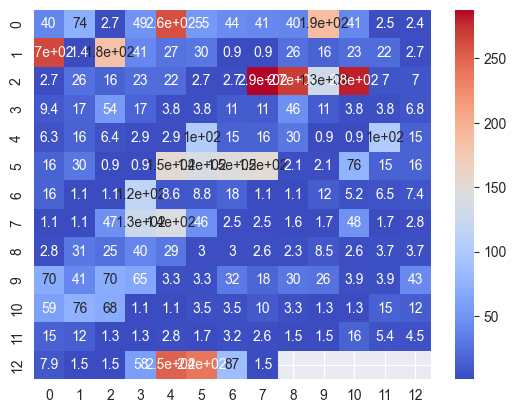

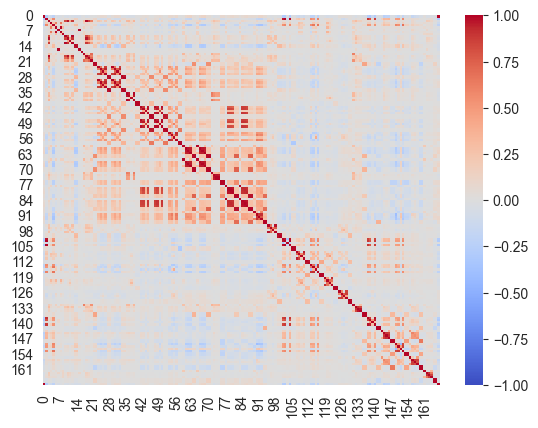

In [4]:
sns.heatmap(np.around(X.apply('std').to_numpy().reshape(13,13), decimals=1), annot=True, cmap="coolwarm")
plt.savefig('std.png')
plt.show()

sns.heatmap(np.around(X.apply('mean').to_numpy().reshape(13,13), decimals=1), annot=True, cmap="coolwarm")
plt.savefig('mean.png')
plt.show()

sns.heatmap(np.around(X.apply('median').to_numpy().reshape(13,13), decimals=1), annot=True, cmap="coolwarm")
plt.savefig('median.png')
plt.show()

sns.heatmap(np.around(X.apply('min').to_numpy().reshape(13,13), decimals=1), annot=True, cmap="coolwarm")
plt.savefig('min.png')
plt.show()

sns.heatmap(np.around(X.apply('max').to_numpy().reshape(13,13), decimals=1), annot=True, cmap="coolwarm")
plt.savefig('max.png')
plt.show()

sns.heatmap(data.drop('class', axis=1).corr(), cmap="coolwarm", vmin=-1, vmax=1)
plt.savefig('corr.png')
plt.show()